<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/%5BLama_Penyinaran%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Cuaca.csv to Cuaca.csv


# **Provinsi Jatim**

In [860]:
# Input data Jatim
input_lama_penyinaran_ratarata = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_lama_penyinaran_ratarata.append(float(row[4]))
    number+=1

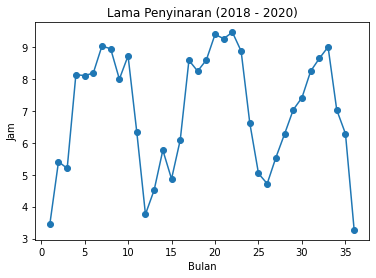

In [861]:
# Grafik garis dari Suhu
plt.plot(number_of_input,input_lama_penyinaran_ratarata,marker='o')
plt.title('Lama Penyinaran (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

In [862]:
# Input dari data pada database
dataset = []
counter=0

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    dataset.append([])
    dataset[counter].append(float(row[4]))
    counter+=1

dataset = np.array(dataset)

print(dataset)

[[3.44]
 [5.41]
 [5.2 ]
 [8.14]
 [8.11]
 [8.19]
 [9.04]
 [8.95]
 [8.  ]
 [8.73]
 [6.35]
 [3.76]
 [4.52]
 [5.77]
 [4.87]
 [6.09]
 [8.59]
 [8.25]
 [8.6 ]
 [9.4 ]
 [9.27]
 [9.47]
 [8.88]
 [6.62]
 [5.04]
 [4.72]
 [5.54]
 [6.28]
 [7.04]
 [7.42]
 [8.25]
 [8.65]
 [9.01]
 [7.03]
 [6.29]
 [3.27]]


In [863]:
# Normalisasi dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [864]:
# Fungsi membuat sequence
def buat_sequences(dataset, window_size):
    input = []
    output = []

    for i in range(len(dataset)-window_size+1):
        window = dataset[i:(i+window_size-4), 0]
        input.append(window)
        output.append(dataset[(i+window_size-1):i+window_size, 0])
    return np.array(input),np.array(output)

window_size = 8
dataInput, dataOutput = buat_sequences(dataset, window_size)

print(len(dataInput))
print(len(dataOutput))

29
29


In [865]:
split_valid = 23
input_train, input_test = dataInput[:split_valid,:], dataInput[split_valid:,:]
output_train, output_test = dataOutput[:split_valid,:], dataOutput[split_valid:,:]

print(len(input_train))
print(len(output_train))

23
23


In [866]:
print(input_test)
print("------")
print(output_test)

[[0.54032258 0.28548387 0.23387097 0.36612903]
 [0.28548387 0.23387097 0.36612903 0.48548387]
 [0.23387097 0.36612903 0.48548387 0.60806452]
 [0.36612903 0.48548387 0.60806452 0.66935484]
 [0.48548387 0.60806452 0.66935484 0.80322581]
 [0.60806452 0.66935484 0.80322581 0.86774194]]
------
[[0.80322581]
 [0.86774194]
 [0.92580645]
 [0.60645161]
 [0.48709677]
 [0.        ]]


In [867]:
# Ubah dimensinya untuk disesuaikan dengan model
input_train = input_train.reshape((input_train.shape[0], 1, 1, 1, window_size-4))
input_test = input_test.reshape((input_test.shape[0], 1, 1, 1, window_size-4))

In [868]:
print(input_test)

[[[[[0.54032258 0.28548387 0.23387097 0.36612903]]]]



 [[[[0.28548387 0.23387097 0.36612903 0.48548387]]]]



 [[[[0.23387097 0.36612903 0.48548387 0.60806452]]]]



 [[[[0.36612903 0.48548387 0.60806452 0.66935484]]]]



 [[[[0.48548387 0.60806452 0.66935484 0.80322581]]]]



 [[[[0.60806452 0.66935484 0.80322581 0.86774194]]]]]


In [869]:
print(output_test)

[[0.80322581]
 [0.86774194]
 [0.92580645]
 [0.60645161]
 [0.48709677]
 [0.        ]]


In [870]:
#model machine learning
model = tf.keras.models.Sequential([
  tf.keras.layers.ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, window_size-4)),    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096),
  tf.keras.layers.Dense(16),
  tf.keras.layers.Dense(1)
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=["mae"])

model.summary()

#fit the model
fitting_history = model.fit(input_train, output_train, validation_data=(input_test, output_test), verbose=2, epochs=100)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_44 (ConvLSTM2D) (None, 1, 1, 64)          17664     
_________________________________________________________________
flatten_43 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_95 (Dense)             (None, 4096)              266240    
_________________________________________________________________
dense_96 (Dense)             (None, 16)                65552     
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 17        
Total params: 349,473
Trainable params: 349,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 - 3s - loss: 0.4600 - mae: 0.6169 - val_loss: 0.2615 - val_mae: 0.4739
Epoch 2/100
1/1 - 0s - los

<Figure size 432x288 with 0 Axes>

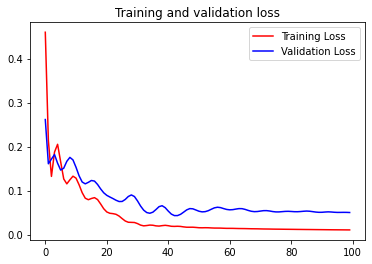

<Figure size 432x288 with 0 Axes>

In [871]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

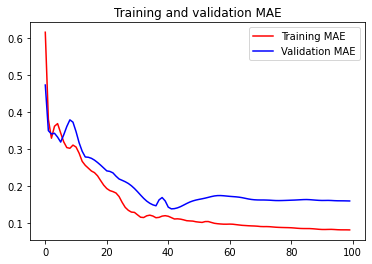

<Figure size 432x288 with 0 Axes>

In [872]:
# Grafik training and validation MAE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [880]:
# Simpan model
model.save('model-lamapenyinaran.h5')

# **Testing Model**

In [874]:
print(input_test)

[[[[[0.54032258 0.28548387 0.23387097 0.36612903]]]]



 [[[[0.28548387 0.23387097 0.36612903 0.48548387]]]]



 [[[[0.23387097 0.36612903 0.48548387 0.60806452]]]]



 [[[[0.36612903 0.48548387 0.60806452 0.66935484]]]]



 [[[[0.48548387 0.60806452 0.66935484 0.80322581]]]]



 [[[[0.60806452 0.66935484 0.80322581 0.86774194]]]]]


In [875]:
# Load the model
model = tf.keras.models.load_model('model-lamapenyinaran.h5')

In [876]:
#Prediksi Data
data_prediksi = model.predict(input_test)

In [877]:
print(data_prediksi)
print("-------")
print(output_test)

[[0.7642388 ]
 [0.78087664]
 [0.86335146]
 [0.7234256 ]
 [0.6399865 ]
 [0.5005775 ]]
-------
[[0.80322581]
 [0.86774194]
 [0.92580645]
 [0.60645161]
 [0.48709677]
 [0.        ]]


In [878]:
# Inverse transform data min max
data_prediksi = scaler.inverse_transform(data_prediksi)
output_test = scaler.inverse_transform(output_test)

In [879]:
print(data_prediksi)
print("-------")
print(output_test)

[[8.008281 ]
 [8.111435 ]
 [8.622779 ]
 [7.7552385]
 [7.2379165]
 [6.373581 ]]
-------
[[8.25]
 [8.65]
 [9.01]
 [7.03]
 [6.29]
 [3.27]]
